# NBA Finals Analysis
### Brendan Ok
#### April 2018

## Data Introduction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

champdata = pd.read_csv('championsdata.csv')
loserdata = pd.read_csv('runnerupsdata.csv') #No second place trophies in the NBA
decadedata = pd.read_csv('stats_by_decade.csv')

In [3]:
champdata.head()

,X,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,89,0.539,...,0.867,12,31,43,30,5,9,17,24,109
1,2,1980,Lakers,2,0,1,240,48,95,0.505,...,0.667,15,37,52,32,12,7,26,27,104
2,3,1980,Lakers,3,1,0,240,44,92,0.478,...,0.767,22,34,56,20,5,5,20,25,111
3,4,1980,Lakers,4,0,0,240,44,93,0.473,...,0.737,18,31,49,23,12,6,19,22,102
4,5,1980,Lakers,5,1,1,240,41,91,0.451,...,0.788,19,37,56,28,7,6,21,27,108


In [4]:
loserdata.head()

,Y,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Sixers,1,0,0,240,40,90,0.444,...,0.786,14,26,40,28,12,13,14,17,102
1,2,1980,Sixers,2,1,0,240,43,85,0.506,...,0.778,5,29,34,34,14,11,20,21,107
2,3,1980,Sixers,3,0,1,240,45,93,0.484,...,0.588,13,24,37,34,12,8,13,25,101
3,4,1980,Sixers,4,1,1,240,41,79,0.519,...,0.885,5,29,34,31,5,10,14,20,105
4,5,1980,Sixers,5,0,0,240,42,94,0.447,...,0.792,13,29,42,32,9,7,12,25,103


In [5]:
champdata.loc[0]

X            1
Year      1980
Team    Lakers
Game         1
Win          1
Home         1
MP         240
FG          48
FGA         89
FGP      0.539
TP           0
TPA          0
TPP        NaN
FT          13
FTA         15
FTP      0.867
ORB         12
DRB         31
TRB         43
AST         30
STL          5
BLK          9
TOV         17
PF          24
PTS        109
Name: 0, dtype: object

In [6]:
loserdata.describe()

,Y,Year,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,216.000,216.000000,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,108.500,1998.513889,3.416667,0.291667,0.49537,241.388889,36.324074,81.601852,0.445255,4.671296,...,0.748014,11.986111,28.740741,40.726852,21.185185,7.388889,4.967593,13.685185,23.861111,96.328704
std,62.498,11.113361,1.739420,0.455585,0.50114,16.114898,6.351456,8.708659,0.060517,4.029924,...,0.088206,4.430842,4.420608,5.973151,5.971480,2.769714,2.772601,3.876340,4.579953,13.761703
min,1.000,1980.000000,1.000000,0.000000,0.00000,40.000000,21.000000,60.000000,0.299000,0.000000,...,0.500000,2.000000,20.000000,26.000000,8.000000,0.000000,0.000000,3.000000,12.000000,54.000000
25%,54.750,1988.750000,2.000000,0.000000,0.00000,240.000000,32.000000,76.000000,0.409500,1.000000,...,0.684000,9.000000,26.000000,36.750000,17.000000,5.000000,3.000000,11.000000,21.000000,88.000000
50%,108.500,1998.000000,3.000000,0.000000,0.00000,240.000000,36.000000,81.000000,0.443500,4.000000,...,0.750000,12.000000,29.000000,41.000000,21.000000,7.000000,4.500000,13.000000,24.000000,95.500000
75%,162.250,2008.000000,5.000000,1.000000,1.00000,240.000000,40.000000,87.000000,0.485250,7.000000,...,0.806500,15.000000,32.000000,44.000000,25.000000,9.000000,7.000000,16.000000,27.000000,105.000000
max,216.000,2017.000000,7.000000,1.000000,1.00000,315.000000,62.000000,105.000000,0.625000,24.000000,...,1.000000,28.000000,44.000000,63.000000,43.000000,15.000000,13.000000,26.000000,38.000000,148.000000


## Data Manipulation
#### The data was separated by winner and loser of each NBA finals since 1980. I consolidated everything into one big dataframe to analyze. 

In [7]:
champwins = champdata[champdata.Win != 0]
loserwins = loserdata[loserdata.Win != 0]
champlosses = champdata[champdata.Win == 0]
loserlosses = loserdata[loserdata.Win == 0]
total = [champdata,loserdata]
totaldata = pd.concat(total, ignore_index=True)
totaldata.to_csv('total_data.csv')

In [12]:
'''
#Change in offensive rebounds over the years for the champions
sns.regplot(x='Year', y='ORB', data=champwins)
#change in defensive rebounds over the years for the champions
sns.regplot(x='Year', y='DRB', data=champwins)
#change in offensive rebounds over the years for the losers
sns.regplot(x='Year', y='ORB', data=loserdata)
#change in defensive rebounds over the years for the losers
sns.regplot(x='Year', y='DRB', data=loserdata)

'''
totaldata.corr()




,AST,BLK,DRB,FG,FGA,FGP,FT,FTA,FTP,Game,...,PTS,STL,TOV,TP,TPA,TPP,TRB,Win,Y,Year
AST,1.000000,0.194001,0.123821,0.749641,0.454247,0.590824,0.029499,0.037604,-0.031971,-0.054542,...,0.683006,0.196441,0.077022,-0.102623,-0.276748,0.097600,0.185989,0.251406,-0.487318,-0.445081
BLK,0.194001,1.000000,0.219700,0.179765,0.159638,0.089639,-0.007369,0.006419,-0.039534,-0.066202,...,0.119094,0.064297,0.161285,-0.153957,-0.188842,-0.031475,0.252737,0.126298,-0.274307,-0.183798
DRB,0.123821,0.219700,1.000000,0.096221,0.070674,0.059490,0.110691,0.125358,-0.007417,-0.055717,...,0.182796,-0.089343,0.048353,0.137214,0.123773,0.033176,0.698958,0.381625,0.183821,0.151810
FG,0.749641,0.179765,0.096221,1.000000,0.665348,0.742642,-0.069200,-0.068486,-0.018330,-0.082516,...,0.854854,0.238974,0.044527,-0.151479,-0.317634,0.084460,0.223357,0.268474,-0.400410,-0.411575
FGA,0.454247,0.159638,0.070674,0.665348,1.000000,0.001000,-0.146139,-0.150414,-0.038281,-0.073518,...,0.494550,0.259208,-0.052962,-0.190765,-0.200009,-0.111257,0.489392,-0.059171,-0.355900,-0.364788
FGP,0.590824,0.089639,0.059490,0.742642,0.001000,1.000000,0.039247,0.039998,0.018193,-0.040828,...,0.704453,0.091934,0.100550,-0.022831,-0.238170,0.214053,-0.139971,0.415639,-0.211544,-0.214627
FT,0.029499,-0.007369,0.110691,-0.069200,-0.146139,0.039247,1.000000,0.926574,0.353332,0.094813,...,0.373248,-0.051407,-0.013607,-0.141299,-0.181846,-0.011878,0.103799,0.216592,-0.227769,-0.183993
FTA,0.037604,0.006419,0.125358,-0.068486,-0.150414,0.039998,0.926574,1.000000,-0.002128,0.089416,...,0.340540,-0.055700,-0.001706,-0.135138,-0.175234,0.013401,0.127991,0.200944,-0.229065,-0.178342
FTP,-0.031971,-0.039534,-0.007417,-0.018330,-0.038281,0.018193,0.353332,-0.002128,1.000000,0.023081,...,0.141767,0.005307,-0.053031,-0.035612,-0.046167,-0.040988,-0.054430,0.102181,-0.000999,-0.015968
Game,-0.054542,-0.066202,-0.055717,-0.082516,-0.073518,-0.040828,0.094813,0.089416,0.023081,1.000000,...,-0.021135,-0.044331,-0.046685,0.035516,0.051502,-0.044009,-0.032042,0.003779,0.028923,0.003119


## Rebounding numbers
#### How has rebounding changed throughout the years. The graphs show the total rebounds gathered from each game. 

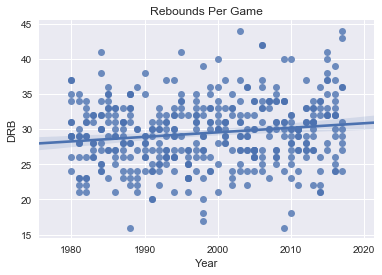

In [9]:
#change in defensive rebounds over the years
sns.regplot(x='Year', y='DRB', data=totaldata, label="DRB").set_title('Defensive Rebounds Per Game')
sns.set(color_codes=True)

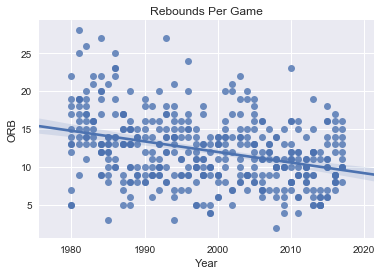

In [10]:
#change in offensive rebounds over the years
sns.regplot(x='Year', y='ORB', data=totaldata, label="ORB").set_title('Offensive Rebounds Per Game')
sns.set(color_codes=True)

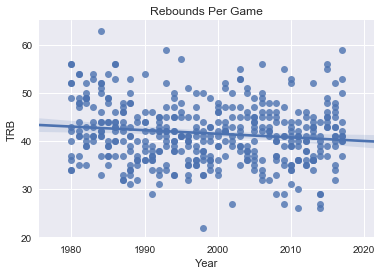

In [11]:
#Change in total rebounding over the years
sns.regplot(x='Year', y='TRB', data=totaldata, label="TRB").set_title('Total Rebounds Per Game')
sns.set(color_codes=True)


**Note:** Looking at total rebounds alone shows that the overall number of boards has gone down slightly, but nothing too noticeable. The thing that pops out to me the most is the big change in offensive boards. However, why are the defensive boards going up over time? One can attribute this to the change in role of big men in the league. Defensive rebounds are simply the easier boards to get, and anyone from the team has a good chance to get them. As lineups get smaller, less offensive rebounds are being recorded. 

## Assist and Turnover Numbers

In [14]:
#create assist to turnover ratio
totaldata['tovratio'] = totaldata['AST'] / totaldata['TOV']

Text(0.5,1,'Total Assists Per Game')

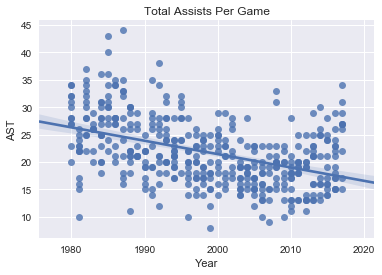

In [42]:
sns.regplot(x='Year', y='AST', data=totaldata).set_title('Total Assists Per Game')

Text(0.5,1,'Turnovers')

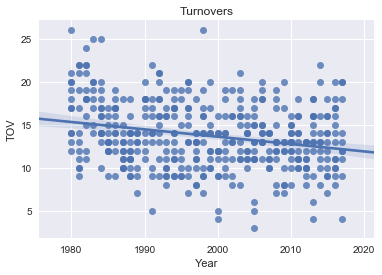

In [39]:
sns.regplot(x='Year', y='TOV', data=totaldata).set_title('Turnovers')

Text(0.5,1,'Assist To Turnover Ratio')

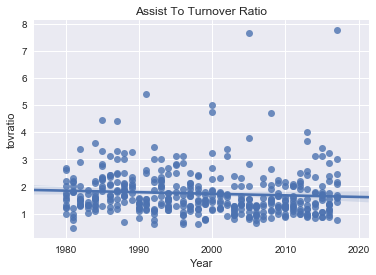

In [17]:
sns.regplot(x='Year', y='tovratio', data=totaldata).set_title('Assist To Turnover Ratio')

**Note:** Interestingly,  despite the big drop off in assists, the assist to turnover rate hasn't changed much. One would think a decrease in assists means they're turning it over more but that doesn't seem to be the case. Players are better at taking care of the ball or maybe there's an increase in isolation play which slows down the pace of the game. Which leads me to believe that the field goal attempts per team will go down

## Field Goal Changes

Text(0.5,1,'Total Field Goals Attempted Per Game')

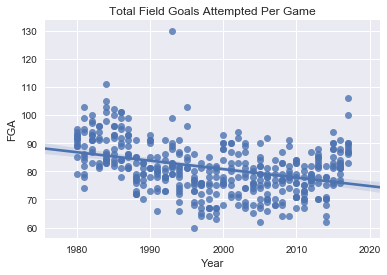

In [43]:
sns.regplot(x='Year', y='FGA', data=totaldata).set_title('Total Field Goals Attempted Per Game')


Text(0.5,1,'Total Field Goals Per Game')

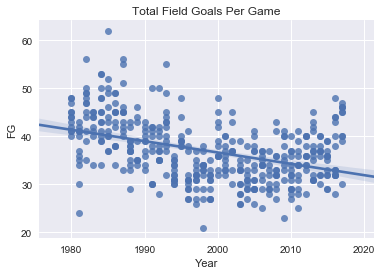

In [44]:
sns.regplot(x='Year', y='FG', data=totaldata).set_title('Total Field Goals Per Game')

Text(0.5,1,'Total Assists Per Game')

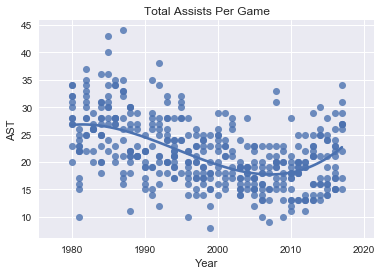

In [45]:
sns.regplot(x='Year', y='AST', data=totaldata,scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Assists Per Game')

Text(0.5,1,'Total Field Goals Per Game')

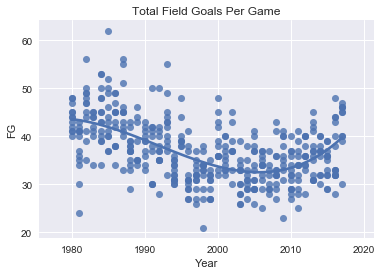

In [47]:
sns.regplot(x='Year', y='FG', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Field Goals Per Game')

**Note:** Seems like AST and FG are positively correlated looking at post 2010 Finals data.

## Three Point Change


Text(0.5,1,'Total Three Point Field Goals Attempted Per Game')

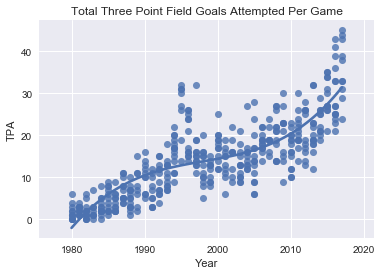

In [53]:
sns.regplot(x='Year', y='TPA', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Three Point Field Goals Attempted Per Game')


Text(0.5,1,'Total Three Point Field Goals Per Game')

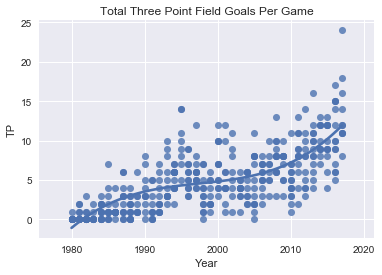

In [52]:
sns.regplot(x='Year', y='TP', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Total Three Point Field Goals Per Game')


Text(0.5,1,'Three Point Percentage Per Game')

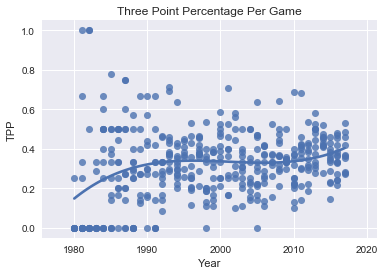

In [56]:
sns.regplot(x='Year', y='TPP', data=totaldata, scatter_kws={"s": 50},order=3, ci=None, truncate=True).set_title('Three Point Percentage Per Game')

**Note:** Percentage seems to have plateaued, which is just about the only surpising aspect of three point shooting in the NBA. However it isn't that surprising considering the change in volume of TPA. It's quite amazing how despite the growth of long range shots, that our efficiency doesn't go down.  